In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import csv
import string
import nltk
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import os
#for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
path = "../input/email-dump/email archive/"

def mostFrequentWord(words):
    lis = []
    words = words.split(', ', 4)
    for i in words:
        for j in i.split():
            lis.append(j)
    freq = Counter(lis)
    max = 0
    for i in freq:
        if(freq[i] > max):
            max = freq[i]
            word = i
            return word


file = open("email_data.csv", "w", newline = "")
fileIDnames = ['Type_of_Email', 
               'Subject', 
               'Num_Subject', 
               'Text_Body', 
               'Num_Text', 
               'Length_Text', 
               'Recurring_word']
writer = csv.DictWriter(file, fieldnames=fileIDnames)
writer.writerow({
        'Type_of_Email': 'Type_of_Email',
        'Subject':'Subject', 
        'Num_Subject': 'Num_Subject', 
        'Text_Body':'Text_Body', 
        'Num_Text':'Num_Text', 
        'Length_Text':'Length_Text', 
        'Recurring_word':'Recurring_word'})

for filename in os.listdir(path):
    curr_open = open(path + filename, "r")
    curr_read = curr_open.read()
    #print(curr_read)
    if filename[0:5] == "spmsg":
        email_type = "Spam"
    else:
        email_type = "Ham"
    
    start = curr_read.find("Suject: ")+len("Subject: ") + 1
    end = curr_read.find("\n\n")
    subject = curr_read[start:end]
    subject_len = len(subject)
    list_subject = subject.split()
    num_subject_words = len(list_subject)
    text_body = curr_read[end:]
    freq_word = mostFrequentWord(text_body)
    text_len = len(text_body)
    list_words = text_body.split()
    num_text_words = len(list_words)

    writer.writerow({
        'Type_of_Email': email_type,
        'Subject':subject, 
        'Num_Subject': num_subject_words, 
        'Text_Body':text_body, 
        'Num_Text':num_text_words, 
        'Length_Text': text_len, 
        'Recurring_word':freq_word})

In [3]:
data = pd.read_csv("./email_data.csv")


In [4]:
data.head()

,Type_of_Email,Subject,Num_Subject,Text_Body,Num_Text,Length_Text,Recurring_word
0,Spam,marketing technology - beyond email,5,\n\nlet 1500 ( + ) call day business . . ( mos...,189,1025,let
1,Spam,"best , better",3,\n\n2 newest hottest interactive adult web sit...,69,313,2
2,Spam,financial freedom while sleep,4,"\n\ndear achiever , are interest online busine...",219,992,dear
3,Ham,available review,2,\n\nbook list below linguist office available ...,150,1061,book
4,Spam,call !,2,\n\nhi ! ever wonder : 's store tomorrow ? ' r...,165,707,hi


In [5]:
print("Shape of the dataset:", data.shape)


Shape of the dataset: (871, 7)


In [6]:
data.isnull().values.any()

True

In [7]:
data.isnull().sum()

Type_of_Email      0
Subject           22
Num_Subject        0
Text_Body          0
Num_Text           0
Length_Text        0
Recurring_word     0
dtype: int64

In [8]:
print("Count of label:\n",data['Type_of_Email'].value_counts())


Count of label:
 Ham     480
Spam    391
Name: Type_of_Email, dtype: int64


In [9]:
data['Length'] = data.Text_Body.str.len()


In [10]:
data['Text_Body'] = data['Text_Body'].str.lower()
# try commenting 
data.head()

,Type_of_Email,Subject,Num_Subject,Text_Body,Num_Text,Length_Text,Recurring_word,Length
0,Spam,marketing technology - beyond email,5,\n\nlet 1500 ( + ) call day business . . ( mos...,189,1025,let,1025
1,Spam,"best , better",3,\n\n2 newest hottest interactive adult web sit...,69,313,2,313
2,Spam,financial freedom while sleep,4,"\n\ndear achiever , are interest online busine...",219,992,dear,992
3,Ham,available review,2,\n\nbook list below linguist office available ...,150,1061,book,1061
4,Spam,call !,2,\n\nhi ! ever wonder : 's store tomorrow ? ' r...,165,707,hi,707


In [11]:
data['Text_Body'] = data['Text_Body'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','Email address')
data['Text_Body'] = data['Text_Body'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Web address')
data['Text_Body'] = data['Text_Body'].str.replace(r'£|\$', 'Money')
data['Text_Body'] = data['Text_Body'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','Phonenumber')
data['Text_Body'] = data['Text_Body'].str.replace(r'[^\w\d\s]', ' ')
data['Text_Body'] = data['Text_Body'].str.replace(r'\s+', ' ')
data['Text_Body'] = data['Text_Body'].str.replace(r'^\s+|\s+?$', '')
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/conda/lib/python3.7/site

,Type_of_Email,Subject,Num_Subject,Text_Body,Num_Text,Length_Text,Recurring_word,Length
0,Spam,marketing technology - beyond email,5,let 1500 call day business most effective hi t...,189,1025,let,1025
1,Spam,"best , better",3,2 newest hottest interactive adult web site so...,69,313,2,313
2,Spam,financial freedom while sleep,4,dear achiever are interest online business com...,219,992,dear,992
3,Ham,available review,2,book list below linguist office available revi...,150,1061,book,1061
4,Spam,call !,2,hi ever wonder s store tomorrow re meet whethe...,165,707,hi,707


In [12]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

data['Text_Body'] = data['Text_Body'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
data['clean_length'] = data.Text_Body.str.len()
data.head()

,Type_of_Email,Subject,Num_Subject,Text_Body,Num_Text,Length_Text,Recurring_word,Length,clean_length
0,Spam,marketing technology - beyond email,5,let 1500 call day business effective hi tech s...,189,1025,let,1025,873
1,Spam,"best , better",3,newest hottest interactive adult web site soon...,69,313,2,313,242
2,Spam,financial freedom while sleep,4,dear achiever interest online business company...,219,992,dear,992,859
3,Ham,available review,2,book list linguist office available review int...,150,1061,book,1061,981
4,Spam,call !,2,hi ever wonder store tomorrow meet whether gre...,165,707,hi,707,560


In [13]:
print("Original Length:",data.Length.sum())
print("Cleaned Length:",data.clean_length.sum())
print("Total Words Removed:",(data.Length.sum()) - (data.clean_length.sum()))

Original Length: 2268817
Cleaned Length: 1867776
Total Words Removed: 401041


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


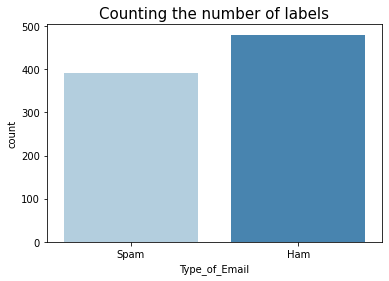

Ham     480
Spam    391
Name: Type_of_Email, dtype: int64


In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data['Type_of_Email'],palette= 'Blues')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(data.Type_of_Email.value_counts())

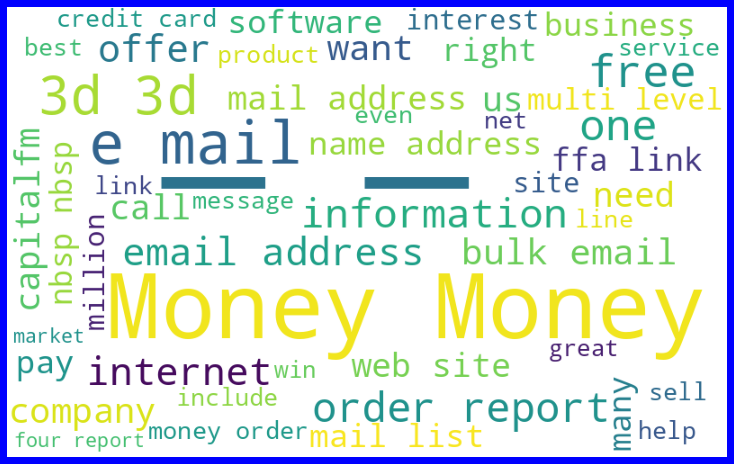

In [15]:
from wordcloud import WordCloud


spams = data['Text_Body'][data['Type_of_Email']=='Spam']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


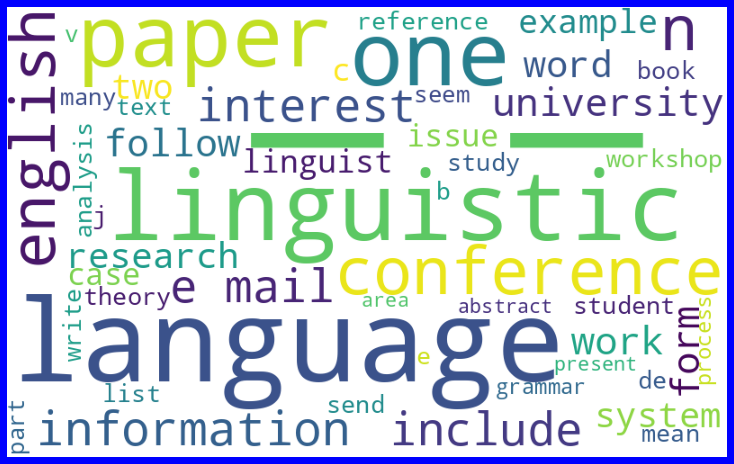

In [16]:
from wordcloud import WordCloud

not_spams = data['Text_Body'][data['Type_of_Email']=="Ham"]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

In [18]:
data = data[['Type_of_Email', 'Text_Body']]
print(data.head())
tags = data["Type_of_Email"]
texts = data["Text_Body"]

  Type_of_Email                                          Text_Body
0          Spam  let 1500 call day business effective hi tech s...
1          Spam  newest hottest interactive adult web site soon...
2          Spam  dear achiever interest online business company...
3           Ham  book list linguist office available review int...
4          Spam  hi ever wonder store tomorrow meet whether gre...


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from keras import metrics

num_max = 1000
le = LabelEncoder()
tags = le.fit_transform(tags)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)
mat_texts = tok.texts_to_matrix(texts,mode='count')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(texts,tags, test_size = 0.3)
mat_texts_tr = tok.texts_to_matrix(x_train,mode='count')
mat_texts_tst = tok.texts_to_matrix(x_test,mode='count')

max_len = 100
x_train = tok.texts_to_sequences(x_train)
x_test = tok.texts_to_sequences(x_test)
cnn_texts_mat = sequence.pad_sequences(x_train,maxlen=max_len)
max_len = 100
cnn_texts_mat_tst = sequence.pad_sequences(x_test,maxlen=max_len)

In [20]:
def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
    return model

In [21]:
def check_model(model,xtr,ytr,xts,yts):
    model.fit(xtr,ytr,batch_size=32,epochs=10,verbose=1,validation_split=0.3)
    print(' ')
    model.evaluate(xts,yts)
    print(len(model.layers)) # 5


In [22]:
m = get_simple_model()
check_model(m,mat_texts_tr,y_train,mat_texts_tst,y_test)



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 644,097
Trainable params: 644,097
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2021-12-13 23:03:05.323414: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


14/14 [==============================] - 1s 42ms/step - loss: 0.3266 - acc: 0.8873 - binary_accuracy: 0.8873 - val_loss: 0.1269 - val_acc: 0.9781 - val_binary_accuracy: 0.9781
Epoch 2/10
14/14 [==============================] - 0s 12ms/step - loss: 0.0705 - acc: 0.9906 - binary_accuracy: 0.9906 - val_loss: 0.0609 - val_acc: 0.9781 - val_binary_accuracy: 0.9781
Epoch 3/10
14/14 [==============================] - 0s 26ms/step - loss: 0.0278 - acc: 0.9977 - binary_accuracy: 0.9977 - val_loss: 0.0381 - val_acc: 0.9891 - val_binary_accuracy: 0.9891
Epoch 4/10
14/14 [==============================] - 0s 26ms/step - loss: 0.0131 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0305 - val_acc: 0.9945 - val_binary_accuracy: 0.9945
Epoch 5/10
14/14 [==============================] - 0s 13ms/step - loss: 0.0072 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0283 - val_acc: 0.9945 - val_binary_accuracy: 0.9945
Epoch 6/10
14/14 [==============================] - 0s 9ms/step - loss: 0.00

In [23]:
def get_cnn_model_v1():   
    model = Sequential()
    model.add(Embedding(1000,20,input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
    return model

In [24]:
m_v1 = get_cnn_model_v1()
check_model(m_v1,cnn_texts_mat,y_train,cnn_texts_mat_tst,y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 20)           20000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 20)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 98, 64)            3904      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation (Activation)      (None, 256)              

In [25]:
def get_cnn_model_v2():   
    model = Sequential()
    model.add(Embedding(1000,50,input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
    return model

In [26]:
m_v2 = get_cnn_model_v2()
check_model(m_v2,cnn_texts_mat,y_train,cnn_texts_mat_tst ,y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 64)            9664      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 256)              

In [27]:
def get_cnn_model_v3():    
    model = Sequential()
    model.add(Embedding(1000,20,input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
    return model

In [28]:

m_v3 = get_cnn_model_v3()
check_model(m_v3,cnn_texts_mat,y_train,cnn_texts_mat_tst ,y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 20)           20000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 20)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 98, 256)           15616     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 256)              

In [29]:
from keras.layers import LSTM

max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

In [30]:
def get_cnn_model_v4():    
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])

    print('Train...')
    return model

In [31]:
m_v4 = get_cnn_model_v4()
check_model(m_v4,cnn_texts_mat,y_train,cnn_texts_mat_tst ,y_test)

Train...
Epoch 1/10
14/14 [==============================] - 11s 503ms/step - loss: 0.6828 - acc: 0.5939 - binary_accuracy: 0.5939 - val_loss: 0.6574 - val_acc: 0.5355 - val_binary_accuracy: 0.5355
Epoch 2/10
14/14 [==============================] - 6s 459ms/step - loss: 0.6963 - acc: 0.6854 - binary_accuracy: 0.6854 - val_loss: 0.6068 - val_acc: 0.9126 - val_binary_accuracy: 0.9126
Epoch 3/10
14/14 [==============================] - 7s 498ms/step - loss: 0.5936 - acc: 0.9695 - binary_accuracy: 0.9695 - val_loss: 0.5886 - val_acc: 0.9071 - val_binary_accuracy: 0.9071
Epoch 4/10
14/14 [==============================] - 6s 462ms/step - loss: 3.2597 - acc: 0.9671 - binary_accuracy: 0.9671 - val_loss: 0.3842 - val_acc: 0.9180 - val_binary_accuracy: 0.9180
Epoch 5/10
14/14 [==============================] - 6s 455ms/step - loss: 0.4374 - acc: 0.9836 - binary_accuracy: 0.9836 - val_loss: 0.4963 - val_acc: 0.9290 - val_binary_accuracy: 0.9290
Epoch 6/10
14/14 [==============================] 

In [32]:
import tensorflow as tf
import joblib

joblib_file = "model.pkl"  
tf.keras.models.save_model(m_v2, joblib_file)


2021-12-13 23:04:31.928695: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
